<a href="https://colab.research.google.com/github/KithminiP/Fraud_Detection/blob/main/Fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("fraud_data.csv")

In [3]:
## View column names & types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28480 entries, 0 to 28479
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    28480 non-null  float64
 1   v1      28480 non-null  float64
 2   v2      28480 non-null  float64
 3   v3      28480 non-null  float64
 4   v4      28480 non-null  float64
 5   v5      28480 non-null  float64
 6   v6      28480 non-null  float64
 7   v7      28480 non-null  float64
 8   v8      28480 non-null  float64
 9   v9      28480 non-null  float64
 10  v10     28480 non-null  float64
 11  v11     28480 non-null  float64
 12  v12     28480 non-null  float64
 13  v13     28480 non-null  float64
 14  v14     28480 non-null  float64
 15  v15     28480 non-null  float64
 16  v16     28480 non-null  float64
 17  v17     28480 non-null  float64
 18  v18     28480 non-null  float64
 19  v19     28480 non-null  float64
 20  v20     28480 non-null  float64
 21  v21     28480 non-null  float64
 22

In [4]:
# Get summary statistics
print(df.describe())

                time            v1            v2            v3            v4  \
count   28480.000000  28480.000000  28480.000000  28480.000000  28480.000000   
mean    94911.903125      0.005118      0.008042     -0.006561      0.010146   
std     47460.318954      1.929395      1.605626      1.510982      1.412465   
min         0.000000    -33.404082    -38.436817    -30.558697     -5.175917   
25%     54493.250000     -0.914220     -0.606529     -0.898421     -0.833641   
50%     84812.000000      0.022977      0.070631      0.171970     -0.008839   
75%    139206.500000      1.315261      0.809600      1.015388      0.748657   
max    172768.000000      2.420346     22.057729      3.893024     12.699542   

                 v5            v6            v7            v8            v9  \
count  28480.000000  28480.000000  28480.000000  28480.000000  28480.000000   
mean       0.011552     -0.005260     -0.009235      0.004352      0.008108   
std        1.362362      1.316694      1.2

In [6]:
# Check fraud vs. normal transactions
print(df['class'].value_counts())

class
b'0'    28431
b'1'       49
Name: count, dtype: int64


Fraudulent Transactions b'1'
Non-Fraudulent Transaction b'0'

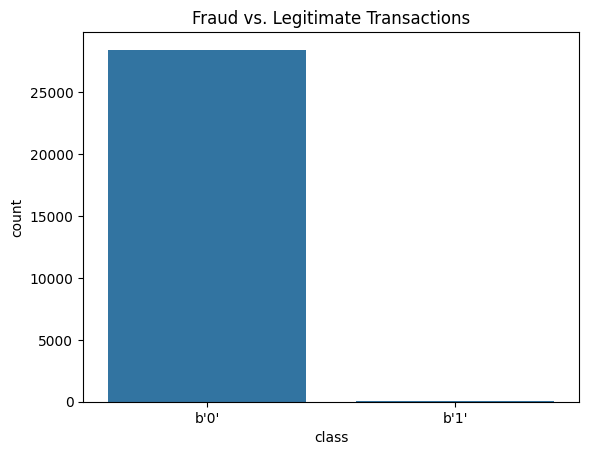

In [7]:
# Count fraud vs. non-fraud cases
sns.countplot(x=df["class"])
plt.title("Fraud vs. Legitimate Transactions")
plt.show()

In [8]:
# Show % of fraud cases
print(df["class"].value_counts(normalize=True))

class
b'0'    0.998279
b'1'    0.001721
Name: proportion, dtype: float64


Fraudulent transactions are less than 5% so the dataset is imbalanced.

In [10]:
# Define features & target
X = df.drop(columns=["class"])
y = df["class"]

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of fraud (class 1)

In [23]:
# Convert byte-string labels to integers
# Ensure y_test and y_pred are properly formatted
y_test = y_test.astype(str).str.replace("b'", "").str.replace("'", "").astype(int)

In [25]:
y_pred = np.array([int(str(x).replace("b'", "").replace("'", "")) for x in y_pred])

In [26]:
# Evaluation Metrics
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\n📌 F1 Score:", round(f1, 4))
print("📌 AUC-ROC Score:", round(roc_auc, 4))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))


📌 F1 Score: 0.6667
📌 AUC-ROC Score: 0.9142

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.67      0.67      0.67         6

    accuracy                           1.00      5696
   macro avg       0.83      0.83      0.83      5696
weighted avg       1.00      1.00      1.00      5696



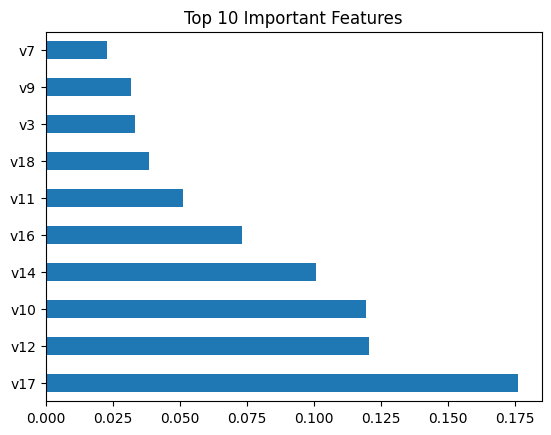

In [13]:
# Feature Importance Plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.show()

Metric	Value	What It Means?

F1 Score:0.6667	The model finds a balance between precision and recall for fraud detection.

AUC-ROC Score:	0.9142	The model is very good at separating fraud vs. non-fraud transactions.

Precision (for class 1):	0.67	When the model says "Fraud", it's correct 67% of the time.

Recall (for class 1):	0.67	The model captures 67% of actual fraud cases but misses 33%.